# Quantum Simulator Example
This code was taken from the lecture slides.

In [2]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler, SamplerOptions
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
# Step 1: Get a fake backend from the fake provider
backend = FakeManilaV2()
print("Current backend:", backend.name)
print("Num qubits:", backend.num_qubits)

Current backend: fake_manila
Num qubits: 5


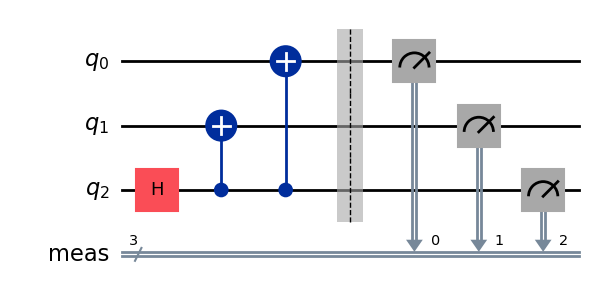

In [3]:
# Step 2: Create a GHZ circuit
circuit = QuantumCircuit(3)
circuit.h(2)
circuit.cx(2,1)
circuit.cx(2,0)
circuit.measure_all()
circuit.draw('mpl')

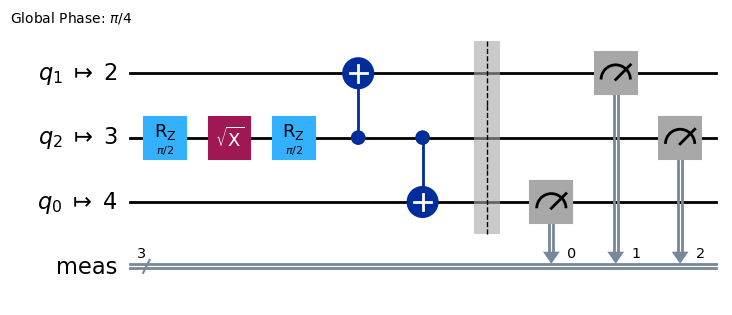

In [4]:
# Step 3: Transpile the ideal circuit to a circuit that can be
# directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')

In [5]:
# Step 4: Create the Sampler with backend as mode
sampler = Sampler(backend)

In [6]:
# Step 5: Run the transpiled circuit using the simulated fake backend and get results
job = sampler.run([transpiled_circuit], shots=1024)
pub_result = job.result()[0]

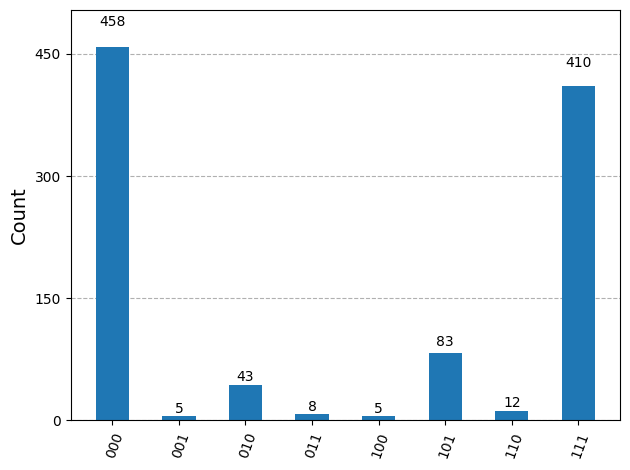

In [8]:
# Step 6: Plot histogram
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)